In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the cleaned data
sales_clean = pd.read_parquet('../data/sales_clean.parquet')

print("Data loaded successfully!")
print("Shape:", sales_clean.shape)

Importing plotly failed. Interactive plots will not work.


Data loaded successfully!
Shape: (46027957, 11)


In [2]:
# Filter to one product at one store
product_id = 'HOBBIES_1_001'
store_id = 'CA_1'

single_item = sales_clean[
    (sales_clean['item_id'] == product_id) &
    (sales_clean['store_id'] == store_id)
].copy()

print("Shape:", single_item.shape)
print("\nFirst few rows:")
print(single_item[['item_id', 'store_id', 'date', 'sales']].head(10))

Shape: (1017, 11)

First few rows:
                item_id store_id       date  sales
16838178  HOBBIES_1_001     CA_1 2013-07-13      0
16862809  HOBBIES_1_001     CA_1 2013-07-14      0
16887440  HOBBIES_1_001     CA_1 2013-07-15      0
16912071  HOBBIES_1_001     CA_1 2013-07-16      0
16936702  HOBBIES_1_001     CA_1 2013-07-17      0
16961333  HOBBIES_1_001     CA_1 2013-07-18      1
16985964  HOBBIES_1_001     CA_1 2013-07-19      0
17010595  HOBBIES_1_001     CA_1 2013-07-20      0
17035335  HOBBIES_1_001     CA_1 2013-07-21      0
17060075  HOBBIES_1_001     CA_1 2013-07-22      0


In [3]:
# Prepare data in Prophet format
df_prophet = single_item[['date', 'sales']].rename(columns={
    'date': 'ds',
    'sales': 'y'
}).reset_index(drop=True)

print("Prophet-ready data shape:", df_prophet.shape)
print("\nFirst few rows:")
print(df_prophet.head())
print("\nLast few rows:")
print(df_prophet.tail())

Prophet-ready data shape: (1017, 2)

First few rows:
          ds  y
0 2013-07-13  0
1 2013-07-14  0
2 2013-07-15  0
3 2013-07-16  0
4 2013-07-17  0

Last few rows:
             ds  y
1012 2016-04-20  1
1013 2016-04-21  3
1014 2016-04-22  0
1015 2016-04-23  1
1016 2016-04-24  1


In [4]:
# Initialize and train Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=0.05
)

model.fit(df_prophet)
print("Model trained successfully!")

13:29:54 - cmdstanpy - INFO - Chain [1] start processing
13:29:56 - cmdstanpy - INFO - Chain [1] done processing


Model trained successfully!


In [5]:
# Create future dataframe for 90 days beyond our data
future = model.make_future_dataframe(periods=90)

# Generate forecast
forecast = model.predict(future)

print("Forecast shape:", forecast.shape)
print("\nKey forecast columns:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# yhat — the model's predicted sales value
# yhat_lower — lower bound of the uncertainty interval
# yhat_upper — upper bound of the uncertainty interval

Forecast shape: (1107, 19)

Key forecast columns:
             ds      yhat  yhat_lower  yhat_upper
1097 2016-07-14  0.657550   -0.425403    1.707955
1098 2016-07-15  0.759925   -0.328059    1.714554
1099 2016-07-16  1.037727    0.005380    2.201059
1100 2016-07-17  0.811605   -0.220512    1.883416
1101 2016-07-18  0.720720   -0.273405    1.801119
1102 2016-07-19  0.839019   -0.141751    1.989489
1103 2016-07-20  0.627113   -0.397580    1.664565
1104 2016-07-21  0.616007   -0.466712    1.680217
1105 2016-07-22  0.723024   -0.274679    1.798885
1106 2016-07-23  1.006027   -0.051189    2.051457


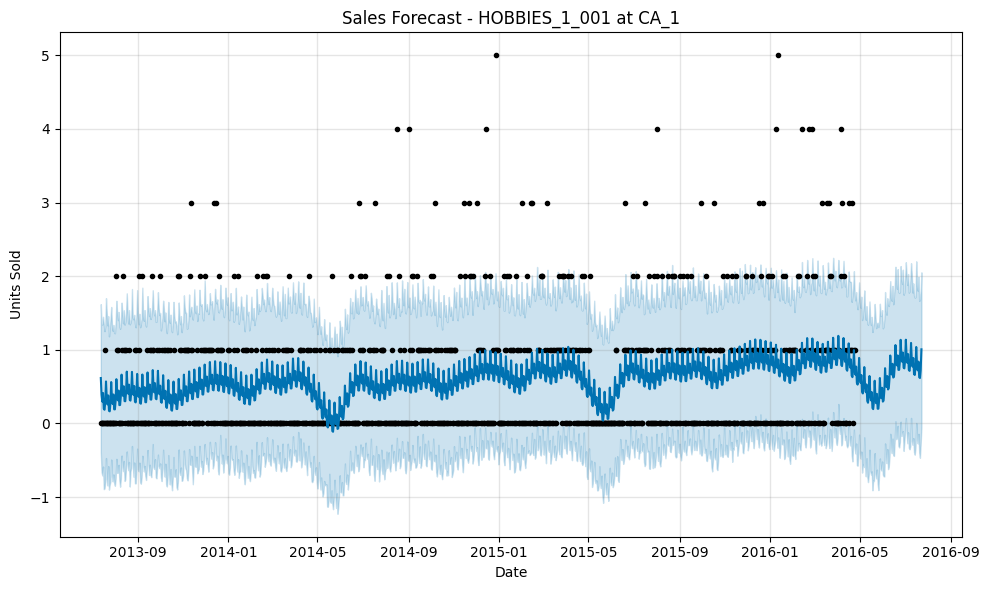

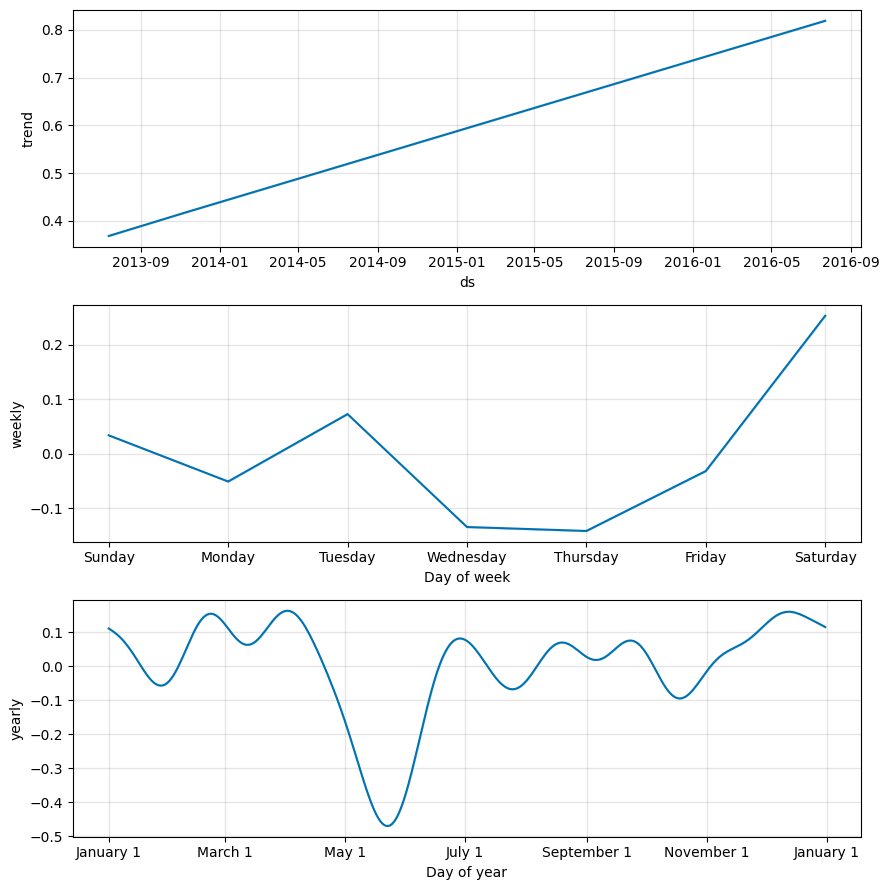

In [6]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title(f'Sales Forecast - {product_id} at {store_id}')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.show()

# Plot the trend and seasonality components
fig2 = model.plot_components(forecast)
plt.tight_layout()
plt.show()